In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import re
import torch
from torch_geometric.data import Data
from torch_geometric.data import DataLoader
import os.path as osp
from dataset import  FalconDataset
import energyflow as ef

In [2]:
#f = open("rep_dim_8_nevents_64000_final.log", "r")
f = open("training.log", "r")
s = f.readlines()
f.close()

In [3]:
s

['INFO:root:Train Epoch: 1 [0/64000 (0%)]\tLoss: 1595.390625\n',
 'INFO:root:Train Epoch: 1 [300/64000 (5%)]\tLoss: 683.323120\n',
 'INFO:root:Train Epoch: 1 [600/64000 (10%)]\tLoss: 1081.607422\n',
 'INFO:root:Train Epoch: 1 [900/64000 (15%)]\tLoss: 835.774536\n',
 'INFO:root:Train Epoch: 1 [1200/64000 (20%)]\tLoss: 661.339844\n',
 'INFO:root:Train Epoch: 1 [1500/64000 (25%)]\tLoss: 769.257996\n',
 'INFO:root:Train Epoch: 1 [1800/64000 (30%)]\tLoss: 639.004028\n',
 'INFO:root:Train Epoch: 1 [2100/64000 (35%)]\tLoss: 355.060425\n',
 'INFO:root:Train Epoch: 1 [2400/64000 (40%)]\tLoss: 619.785339\n',
 'INFO:root:Train Epoch: 1 [2700/64000 (45%)]\tLoss: 661.077759\n',
 'INFO:root:Train Epoch: 1 [3000/64000 (50%)]\tLoss: 932.034058\n',
 'INFO:root:Train Epoch: 1 [3300/64000 (55%)]\tLoss: 625.927734\n',
 'INFO:root:Train Epoch: 1 [3600/64000 (60%)]\tLoss: 1026.849365\n',
 'INFO:root:Train Epoch: 1 [3900/64000 (65%)]\tLoss: 659.445068\n',
 'INFO:root:Train Epoch: 1 [4200/64000 (70%)]\tLoss: 

In [4]:
sn = np.array(s)
s_mask = np.array(['Batch loss' in line for line in s])

In [5]:
loss = sn[s_mask]


In [6]:
loss_n = [ re.search('Batch loss:(.*)\n',line).group(1) for line in loss]
loss_array = np.array(loss_n, dtype='float32')

In [7]:
loss_array.shape

(1020,)

In [8]:
loss_array

array([707.5258 , 606.8831 , 566.3222 , ..., 229.90028, 230.08739,
       229.9812 ], dtype=float32)

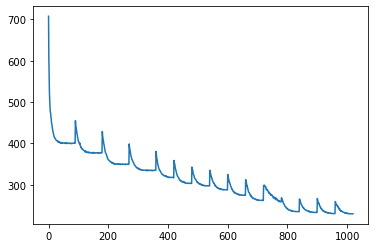

In [9]:
plt.plot(loss_array)

In [10]:
loss_array[-1]

229.9812

In [23]:
def preprocess_emd(torch_batch):
    batch_size = torch_batch.batch[-1] + 1
    ret = []
    for batch_idx in range(batch_size):
        ret.append(torch_batch.x[torch_batch.batch == batch_idx][:,:3].cpu().detach().numpy())
    return ret

In [24]:
batch_size = 32
device = torch.device('cuda:2')
kwargs = {'num_workers': 1, 'pin_memory': True}
dataset = FalconDataset('')[:64000]
test_loader = DataLoader(dataset,batch_size=batch_size, shuffle=True, drop_last=True, **kwargs)
it = iter(test_loader)

In [25]:
total = []

In [12]:
for _ in range(50):
    single = next(it)

    single

    a = preprocess_emd(single)
    target = ef.emd.emds(a, R=1.0)
    target
    total.append(np.unique(target.flatten()))

(array([7.39710524e-04, 2.51501578e-04, 3.55061051e-03, 8.55105365e-03,
        1.33887605e-02, 1.62884257e-02, 1.75903163e-02, 1.91732968e-02,
        2.06527178e-02, 2.05491583e-02, 2.09338078e-02, 2.06231294e-02,
        2.05639526e-02, 1.88182357e-02, 1.70429305e-02, 1.54303615e-02,
        1.56226863e-02, 1.37734100e-02, 1.31076705e-02, 1.09477158e-02,
        9.48308891e-03, 7.55984155e-03, 7.38231103e-03, 6.08042050e-03,
        5.60700577e-03, 4.76373577e-03, 4.76373577e-03, 4.51223419e-03,
        3.87608314e-03, 3.56540472e-03, 3.31390315e-03, 2.85528262e-03,
        3.07719578e-03, 2.70734052e-03, 2.02680683e-03, 1.49421526e-03,
        1.44983263e-03, 1.07997736e-03, 1.39065578e-03, 6.36151050e-04,
        5.76974208e-04, 3.40266841e-04, 3.40266841e-04, 3.99443683e-04,
        2.66295789e-04, 2.21913157e-04, 1.03559473e-04, 4.43826314e-05,
        8.87652628e-05, 2.95884209e-05]),
 array([  0.        ,   2.72008086,   5.44016171,   8.16024257,
         10.88032342,  13.6004

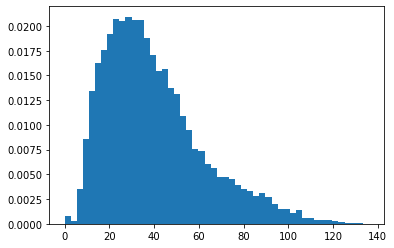

In [13]:
plt.hist(np.concatenate(total), bins=50,density=True)